# Workshop 12 Datasets & DataLoaders
สำหรับข้อมูลที่กำหนดให้ ให้นักศึกษา
1. สร้าง Dataset
2. สร้าง DataLoader โดยกำหนด batch size เป็น 32
3. ทดลองเรียกข้อมูลจากข้อ 1 มาแสดงให้เห็นว่าสามารถทำได้
4. ทดลองเรียกข้อมูลจากข้อ 2 มาแสดงให้เห็นว่าสามารถทำได้
5. สร้าง transform ของข้อมูลแต่ละชุดแล้วทำตามข้อ 3 และ 4 เพื่อแสดงให้เห็นว่าสามารถทำได้


In [1]:
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torchvision import transforms
import torch
import pandas as pd
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from torch import Tensor

## A. Tabular data
ใช้ข้อมูลที่เตรียมไว้ให้

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
header_list = ["sepal_length","sepal_width", "petal_length", "petal_width","species"]
df = pd.read_csv(data_url,header=None,names=header_list,encoding='utf-8')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
class TabularDataset(Dataset):
  def __init__(self, X, y, scaler=None):
    self.X = X
    self.y = y
    self.scaler = scaler

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    data = self.X[idx]
    label = self.y[idx]
    if self.scaler:
      data = self.scaler.transform(data.reshape(1, -1)).flatten()
    return data, label

In [4]:
tbd = TabularDataset(X,y)

In [5]:
dataloader = DataLoader(dataset=tbd, batch_size=32, shuffle=True)

In [6]:
data, label = tbd.__getitem__(0)
print(data, label)

[5.1 3.5 1.4 0.2] 0


In [7]:
next(iter(dataloader))

[tensor([[5.8000, 2.7000, 5.1000, 1.9000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [6.3000, 3.4000, 5.6000, 2.4000],
         [6.4000, 2.8000, 5.6000, 2.2000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [5.5000, 2.6000, 4.4000, 1.2000],
         [4.9000, 3.1000, 1.5000, 0.1000],
         [7.6000, 3.0000, 6.6000, 2.1000],
         [6.5000, 3.2000, 5.1000, 2.0000],
         [6.2000, 3.4000, 5.4000, 2.3000],
         [5.6000, 2.9000, 3.6000, 1.3000],
         [4.4000, 3.0000, 1.3000, 0.2000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [5.5000, 2.5000, 4.0000, 1.3000],
         [6.7000, 3.0000, 5.0000, 1.7000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [6.7000, 3.1000, 4.4000, 1.4000],
         [5.7000, 2.8000, 4.5000, 1.3000],
         [6.3000, 2.3000, 4.4000, 1.3000],
         [5.8000, 2.8000, 5.1000, 2.4000],
         [6.3000, 2.9000, 5.6000, 1.8000],
         [5.7000, 3.0000, 4.2000, 1.2000],
         [4

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
tbd = TabularDataset(X, y, scaler)
dataloader = DataLoader(dataset=tbd, batch_size=32, shuffle=True)
next(iter(dataloader))

[tensor([[0.7222, 0.4583, 0.6610, 0.5833],
         [0.6667, 0.4167, 0.7119, 0.9167],
         [0.3333, 0.1667, 0.4746, 0.4167],
         [0.4722, 0.3750, 0.5932, 0.5833],
         [0.5000, 0.3333, 0.6271, 0.4583],
         [0.3889, 1.0000, 0.0847, 0.1250],
         [0.4167, 0.2917, 0.6949, 0.7500],
         [0.3056, 0.7917, 0.1186, 0.1250],
         [0.4167, 0.2500, 0.5085, 0.4583],
         [0.2500, 0.6250, 0.0847, 0.0417],
         [0.7500, 0.5000, 0.6271, 0.5417],
         [0.9444, 0.3333, 0.9661, 0.7917],
         [0.5000, 0.4167, 0.6102, 0.5417],
         [0.5556, 0.3750, 0.7797, 0.7083],
         [0.1944, 0.6250, 0.1017, 0.2083],
         [0.2222, 0.5833, 0.0847, 0.0417],
         [0.5278, 0.0833, 0.5932, 0.5833],
         [0.5556, 0.5833, 0.7797, 0.9583],
         [0.3889, 0.3333, 0.5932, 0.5000],
         [0.1944, 0.5417, 0.0678, 0.0417],
         [0.6111, 0.4167, 0.7119, 0.7917],
         [0.2222, 0.2083, 0.3390, 0.4167],
         [0.6944, 0.4167, 0.7627, 0.8333],
         [0

## B. Image data from folders with labels inferred from folder names
โหลดข้อมูลแล้วสร้าง dataset โดยใช้ ImageFolder เป็นหลัก
data:  https://drive.google.com/file/d/1yCH8zIGo9KjdscRfrvpR1R7mel4uq1GH/view?usp=drive_link

Pytorch doc: [ImageFolder](https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)

In [ ]:
# !gdown 1yCH8zIGo9KjdscRfrvpR1R7mel4uq1GH

In [ ]:
# !unzip Small_Data_CoV2.zip

In [36]:
class CustomImageDataset(Dataset):
  def __init__(self, image_paths, labels, transform=None):
    self.image_paths = image_paths
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    image = Image.open(self.image_paths[idx]).convert('RGB')
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    # image_np = np.array(image)
    image_np = np.array(image.permute(1, 2, 0))
    return image_np, label

In [30]:
df_dic = {}
base_path = r'D:\KKU_World\Learn\second_year\2_1\aiWorkshop\for_final_exam\data\Small_Data_CoV2'
for folder in ['Small_Data_CoV2_train', 'Small_Data_CoV2_test', 'Small_Data_CoV2_val']:
  filename = []
  label = []
  folder_path = os.path.join(base_path, folder)
  for dirname, _, filenames in os.walk(folder_path):
    for file in filenames:
      f = os.path.join(dirname, file)
      if '.png' in f:
        # print(dirname)
        filename.append(f)
        label.append(dirname.split('\\')[10])
  df_dic[folder.split('_')[3]] = pd.DataFrame({'filename':filename, 'label':label})
df_dic['train']

,filename,label
0,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Covid
1,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Covid
2,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Covid
3,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Covid
4,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Covid
...,...,...
592,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Others
593,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Others
594,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Others
595,D:\KKU_World\Learn\second_year\2_1\aiWorkshop\...,Others


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_dic['train']['label'] = le.fit_transform(df_dic['train']['label'])
df_dic['test']['label'] = le.fit_transform(df_dic['test']['label'])
df_dic['val']['label'] = le.fit_transform(df_dic['val']['label'])

In [32]:
# train_dataset = CustomImageDataset(df_dic['train']['filename'], df_dic['train']['label'])
# test_dataset = CustomImageDataset(df_dic['test']['filename'], df_dic['test']['label'])
# val_dataset = CustomImageDataset(df_dic['val']['filename'], df_dic['val']['label'])

In [37]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = CustomImageDataset(df_dic['train']['filename'], df_dic['train']['label'], transform=transform)
test_dataset = CustomImageDataset(df_dic['test']['filename'], df_dic['test']['label'], transform=transform)
val_dataset = CustomImageDataset(df_dic['val']['filename'], df_dic['val']['label'], transform=transform)

In [38]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)

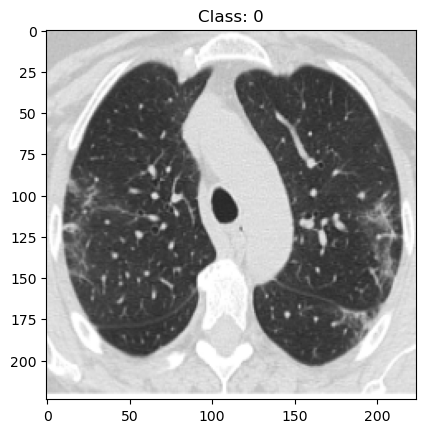

In [41]:
image_np, label = train_dataset.__getitem__(0)
plt.imshow(image_np)
plt.title(f"Class: {label}")
plt.show()

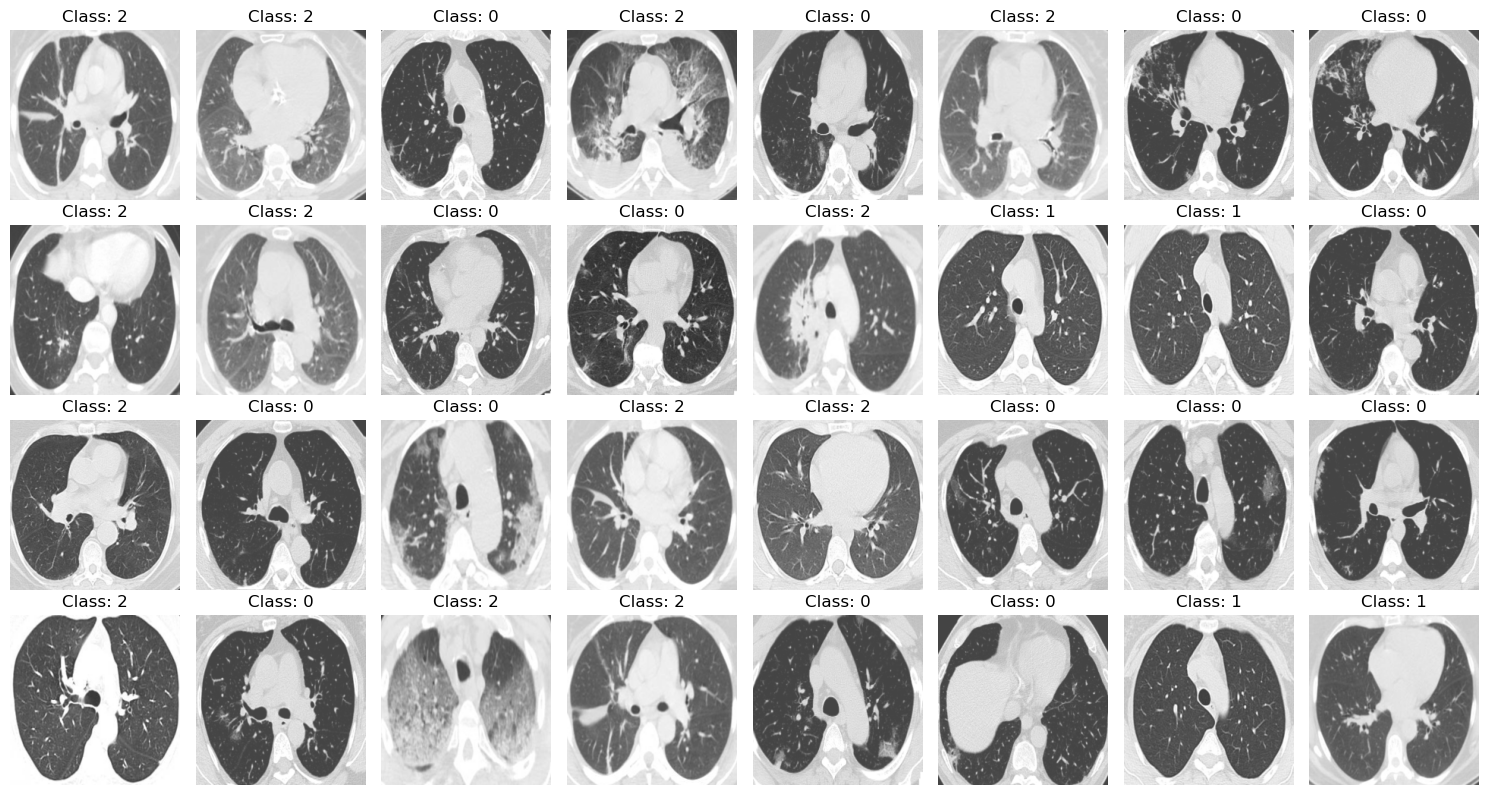

In [42]:
images, labels = next(iter(train_dataloader))
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(32):
  image_tensor = images[i]
  label = labels[i]
  ax = axes[i // 8, i % 8]
  ax.imshow(image_tensor)
  ax.set_title(f"Class: {label.item()}")
  ax.axis('off')

plt.tight_layout()
plt.show()

## C. Image data from file names and label list
โหลดข้อมูลแล้วอ่านชื่อทุกไฟล์ภาพใน folder ย่อยมาเก็บไว้ แล้วสร้าง dataset ขึ้นมาใช้เอง

data: https://drive.google.com/file/d/1yCH8zIGo9KjdscRfrvpR1R7mel4uq1GH/view?usp=drive_link

Pytorch tutorial: [data tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

In [ ]:
# !gdown 1yCH8zIGo9KjdscRfrvpR1R7mel4uq1GH

In [ ]:
# !unzip Small_Data_CoV2.zip

In [ ]:
class CustomImageDataset(Dataset):
  def __init__(self, image_paths, labels, transform=None):
    self.image_paths = image_paths
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    image = Image.open(self.image_paths[idx]).convert('RGB')
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    # image_np = np.array(image)
    image_np = np.array(image.permute(1, 2, 0))
    return image_np, label

In [ ]:
filename = []
label = []
for dirname, _, filenames in os.walk(f'/content'):
  for file in filenames:
    f = os.path.join(dirname, file)
    if '.png' in f:
      filename.append(f)
      label.append(dirname.split('/')[3])
df = pd.DataFrame({'filename':filename, 'label':label})
df.head(10)

,filename,label
0,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
1,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
2,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
3,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
4,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
5,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
6,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
7,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
8,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid
9,/content/Small_Data_CoV2_val/Covid/Patient (13...,Covid


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = CustomImageDataset(df['filename'], df['label_encoded'], transform=transform)
dataloader = DataLoader(dataset=dataset, batch_size=32, shuffle=True)

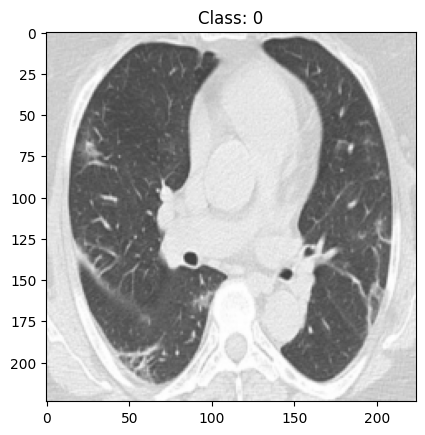

In [ ]:
image_np, label = dataset.__getitem__(0)
plt.imshow(image_np)
plt.title(f"Class: {label}")
plt.show()

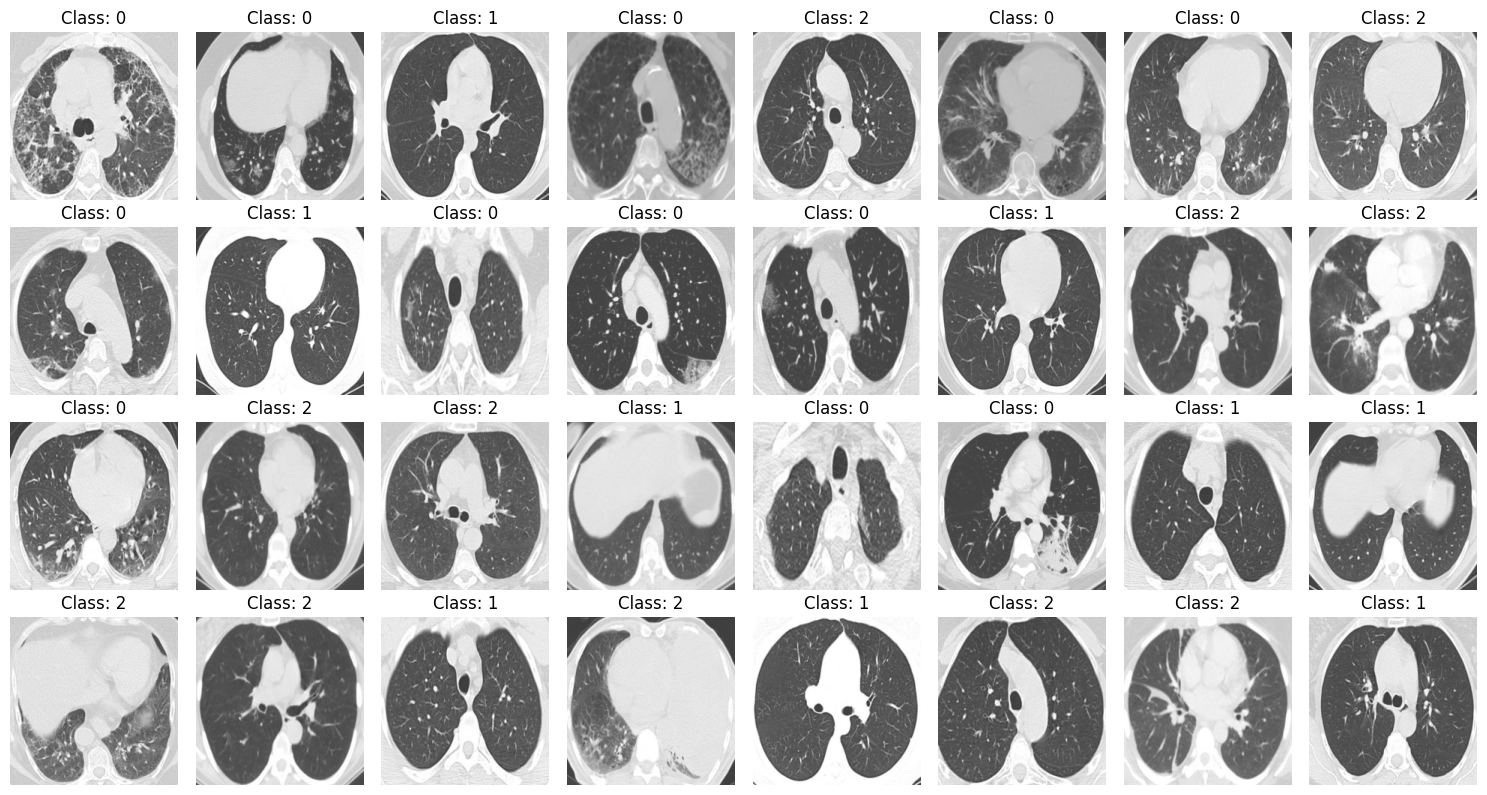

In [ ]:
images, labels = next(iter(dataloader))
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(32):
  image_tensor = images[i]
  label = labels[i]
  ax = axes[i // 8, i % 8]
  ax.imshow(image_tensor)
  ax.set_title(f"Class: {label.item()}")
  ax.axis('off')

plt.tight_layout()
plt.show()